In [71]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE  import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [73]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/BiPotLowNoise/


In [74]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "Diff01_MSEs" in f:
        print(f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Hermite_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_MSEs.parquet


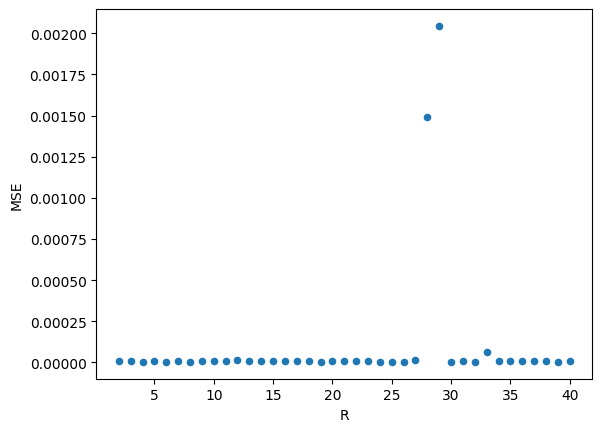

In [75]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [76]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
2      0.000006
3      0.000007
4      0.000004
5      0.000011
6      0.000004
7      0.000008
8      0.000005
9      0.000010
10     0.000010
11     0.000006
12     0.000017
13     0.000006
14     0.000008
15     0.000008
16     0.000010
17     0.000009
18     0.000007
19     0.000004
20     0.000006
21     0.000011
22     0.000007
23     0.000006
24     0.000005
25     0.000006
26     0.000005
27     0.000012
28     0.001489
29     0.002044
30     0.000003
31     0.000007
32     0.000005
33     0.000066
34     0.000006
35     0.000009
36     0.000007
37     0.000011
38     0.000009
39     0.000004
40     0.000009


0    0.000003
Name: 30, dtype: float64


In [77]:
from configs import project_config
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Hermite_f{diradd.replace('LowNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

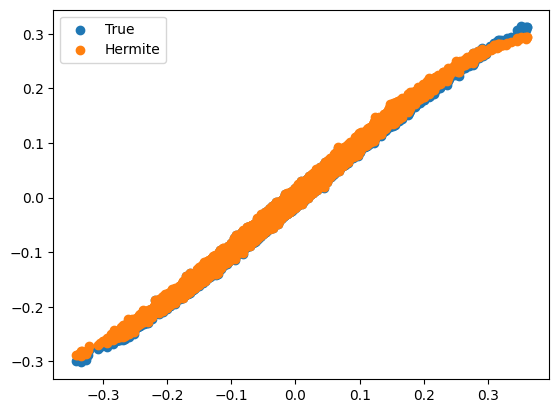

In [78]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Hermite")
plt.legend()
plt.show()